In [224]:
%cd /content/drive/MyDrive/MYST1_CAPSTONEPROJECT/


/content/drive/MyDrive/MYST1_CAPSTONEPROJECT


This project is based on this diamond dataset

(https://www.kaggle.com/code/karnikakapoor/diamond-price-prediction/input)

**Step 1: Reading the dataset**
* It contains the details about 53940 diamonds
* My  task is to create a machine learning model which can predict the average price of diamonds based on its charecteristics
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on
(machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.


In [225]:
#Supressing Warning Messages
import warnings
warnings.filterwarnings('ignore')

In [226]:
#Reading The Dataset
import pandas as pd
import numpy as np
DiamondData = pd.read_csv('/content/drive/MyDrive/MYST1_CAPSTONEPROJECT/diamonds.csv', encoding='latin1')
print('Shape before deleting duplication', DiamondData.shape)

#Remove Duplicate Rows if Any
DiamondData = DiamondData.drop_duplicates()
print('Shape after deleting duplication', DiamondData.shape)

#Printing Sample Data
#Start observing the Quantative/Categorical/Qualilative varaibles
DiamondData.head(10)

Shape before deleting duplication (53940, 11)
Shape after deleting duplication (53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


**Key Observations From Step 1**
* The file contains 53940 diamond details
There are 10 attributes and they are listed below
* Unnamed: 0 - This is an index, counting the total number of diamonds
* carat - weight of the diamond (0.2--5.01)
* cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color - diamond colour, from J (worst) to D (best)  
* depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table - width of top of diamond relative to widest point (43--95)
* price - price in US dollars
* x - length in mm
* y - width in mm
* z - depth in mm



**Step 2: Problem statement definition**
* Creating a prediction model to predict the price (price) of a diamond
* Target Variable: price
* Predictors/Features: carat, cut, color, depth, table, price, x, y, z


**Step 4: Visualising the distribution of Target variable**


Text(0.5, 1.0, 'Histogram of Diamond Prices')

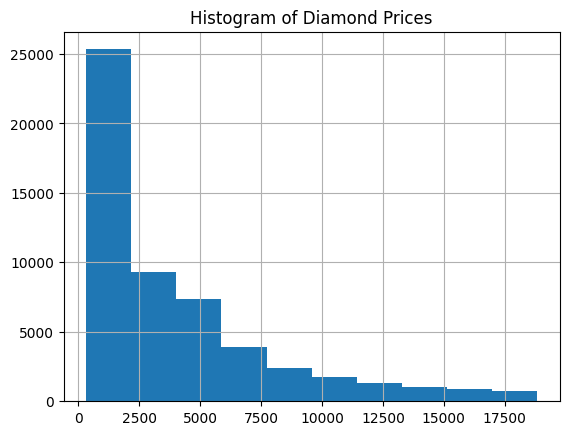

In [227]:
import matplotlib.pyplot as plt

#Plotting a histogram of the target variable
%matplotlib inline
DiamondData['price'].hist()
plt.title('Histogram of Diamond Prices')

**Observations From Step 4:**
* The data distrubution of the target variable is unsatisfactory, as it is too skewed. The data appears to be downward sloping at a seemingly exponential  rate
* When preforming regression algorithm modelling and, we neeed roughly a bell curve shape
The data distrubution of the target variable is unsatisfactory and needs to be transformed

To normalise this data, we apply a **Log** Transformation to the target variable data

In [228]:
import numpy as np

# Preforming the logarithmic transformation on our price variable
transformed_prices = np.log(DiamondData['price'])

# Overwriting old price data with new transformed data
DiamondData['price'] = transformed_prices

# Checking if the data has been transformed effectively
DiamondData.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,5.786897,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,5.786897,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,5.789960,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,5.811141,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,5.814131,4.34,4.35,2.75


Text(0.5, 1.0, 'Histogram of Diamond Prices')

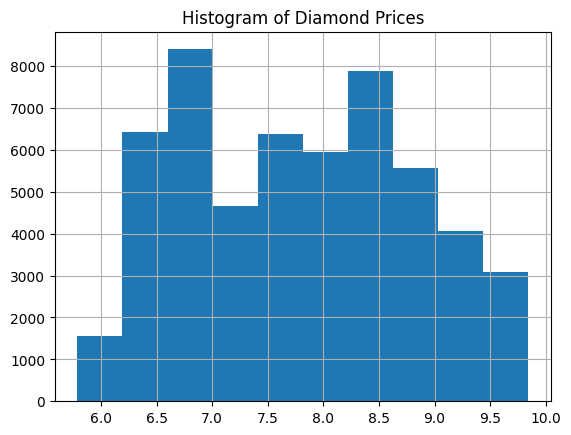

In [229]:
import matplotlib.pyplot as plt

#Checking new histogram shape of target variable
%matplotlib inline
DiamondData['price'].hist()
plt.title('Histogram of Diamond Prices')

**Observations from Log Transformation**
* Now the data is satisfactory and can be used for further regression algorithm modelling and analysis




**Step 5: Data exploration at basic level**

In [230]:
#Observing sample rows of data
DiamondData.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,5.786897,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,5.786897,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,5.789960,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,5.811141,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,5.814131,4.34,4.35,2.75


In [231]:
#Observing sample rows of data
DiamondData.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,7.921898,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,7.921898,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,7.921898,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,7.921898,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,7.921898,5.83,5.87,3.64


In [232]:
#Observing summarized information of the data
DiamondData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  float64
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


In [233]:
#Observing descriptive statistics of the data
DiamondData.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,7.786768,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,1.014649,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,5.786897,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,6.856462,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,7.783641,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,8.580027,6.540000,6.540000,4.040000


In [234]:
#Identifying categorical and continous variables
DiamondData.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

**Observations from Step 5**
  * carat - Continuous: Selected
  * cut: - Qualitative: Removed
  * color - Qualitative: Removed
  * clarity - Qualitative: Removed
  * depth - Continous: Selected
  * price - Continous: Selected - This is the Target Variable
  * x - Continous: Selected
  * y - Continous: Selected
  * z - Continous: Selected


**Step 6: Removing Unwanted Columns/Data Conversion to numeric values for machine
learning/predictive analysis**
* There are three qualitative columns (cut, color and clarity)
* These columns can not be removed as they are vital data for future modelling and analysis
* Therefore we convert these columns into ordinal data
* Additonally the index variable (Unnamed: 0) will be removed


In [235]:
# Define dictionaries to map categories to numerical values
cut_key = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_key = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_key = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

# Map categories to numerical values using replace
DiamondData['cut'] = DiamondData['cut'].replace(cut_key)
DiamondData['color'] = DiamondData['color'].replace(color_key)
DiamondData['clarity'] = DiamondData['clarity'].replace(clarity_key)

#Removing the index variable
DiamondData = DiamondData.drop(columns=['Unnamed: 0'])

# Display sample rows with new ordinal data
DiamondData.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,5.786897,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,5.786897,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,5.789960,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,5.811141,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,5.814131,4.34,4.35,2.75


**Step 7: Visual Exploratory Data Analysis of data (with Histogram
and Barcharts)**
* Based on Step 5 (Data exploration at a basic level), all variables used are continuous, as they have more than 20 unique values
* These variables are
* carat
* depth
* table
* x
* y
* z


**Categorical Predictor Analysis**
* We have three categorical predictors
* cut
* color
* clarity

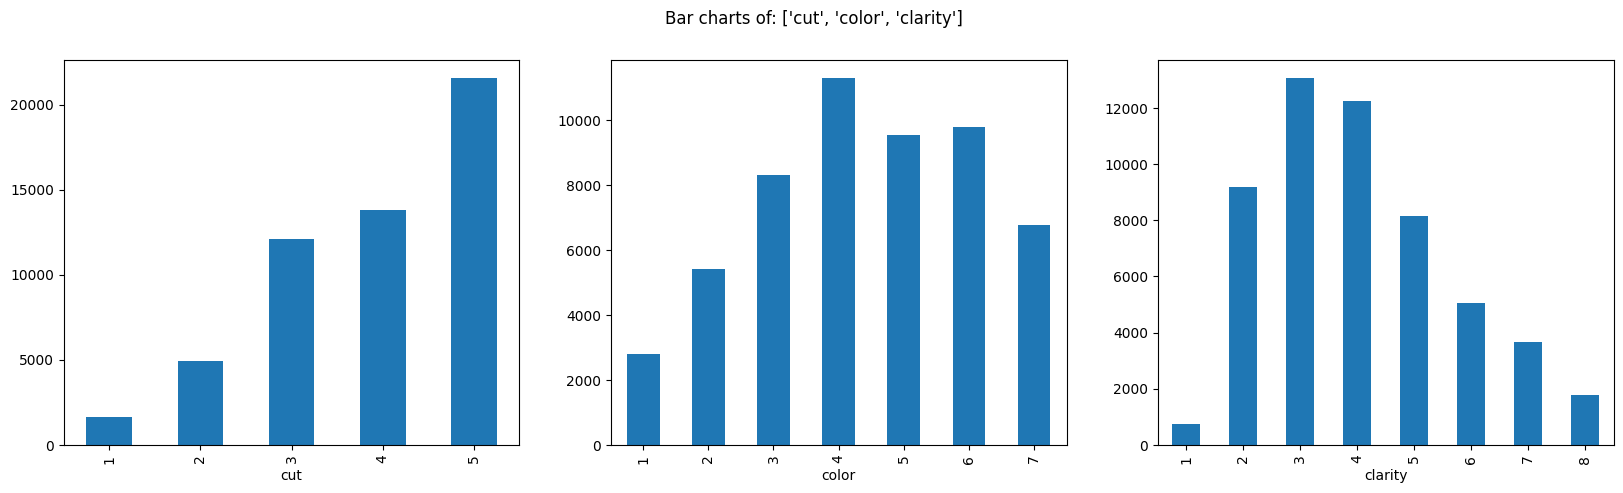

In [236]:
#Plotting bar charts of each categorical predictor to view data distrubution
def PlotBarCharts(inputData, colsToPlot):
  %matplotlib inline

  import matplotlib.pyplot as plt

  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
  fig.suptitle('Bar charts of: '+ str(colsToPlot))
  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inputData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

PlotBarCharts(inputData=DiamondData, colsToPlot=['cut','color', 'clarity'])

**Bar Chart Observations**
**All categorical predictors have a similar bell curve shape indicating a equal distrubution of data
Selected Categorical Variables ('cut', 'color', 'clarity): All the categorical variables are selected for further analysis.


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

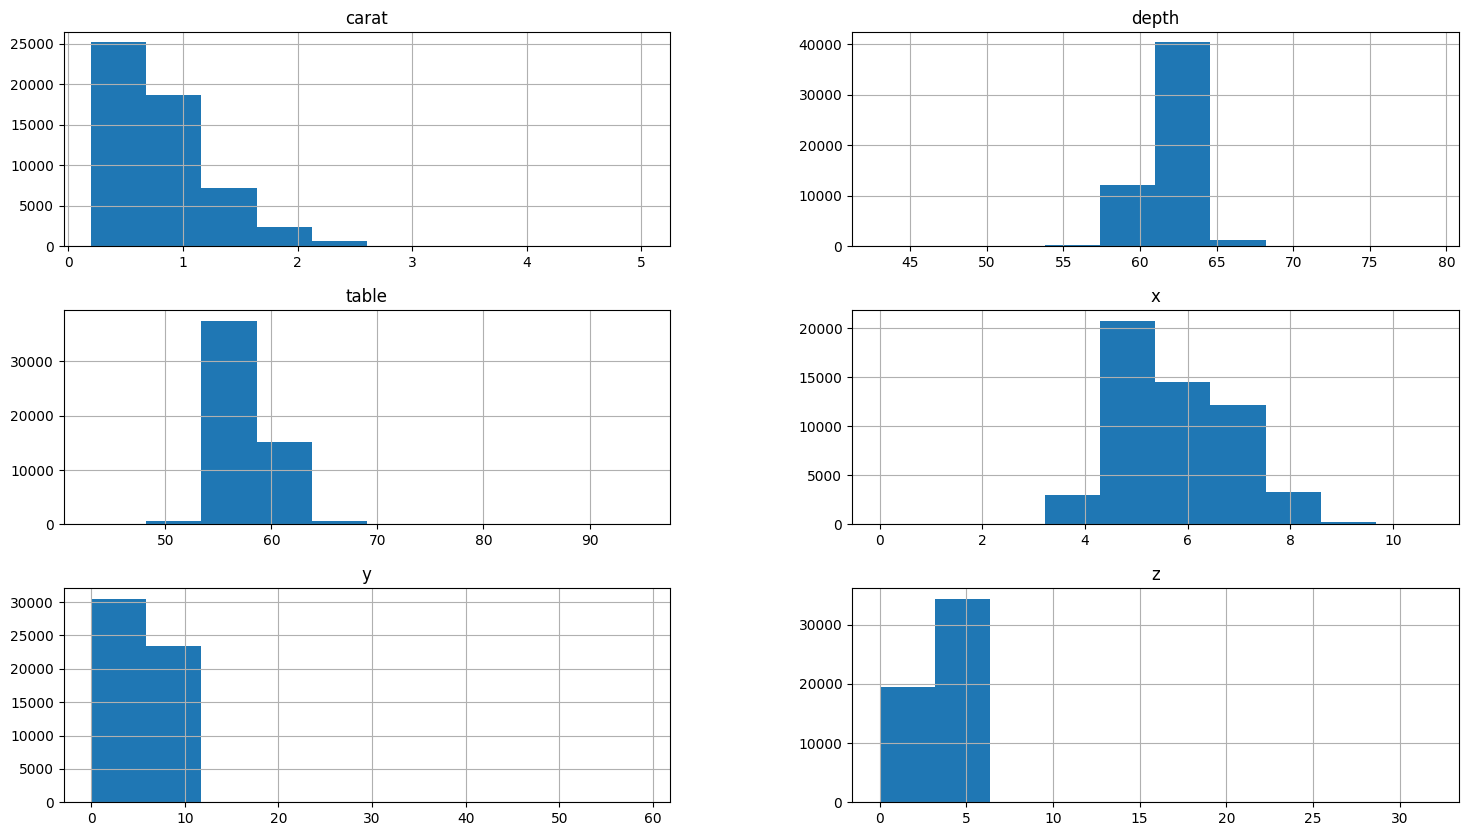

In [237]:
#Plotting histograms of continous variables
DiamondData.hist(['carat', 'depth', 'table', 'x', 'y', 'z'], figsize=(18,10))


**Observations from Step 8:**
* The ideal outcome for the above histograms is a bell curve
* However, no data is skewed extremely and is therefore satisfactory to continue analysis and modelling
* carat - Selected: The distribution is good
* depth - Selected: The distribution is good
* table - Selected: The distribution is good
* x - Selected: The distribution is good
* y - Selected: The distribution is good
* z - Selected: The distribution is good


**Step 9: Outlier Analysis**
* No extreme data found in any histogram
* No outliers present

**Step 10:  Visual and Statistic Correlation analysis for selection of
best features**

Relationship exploration: Continuous Vs Continuous: Scatter Charts


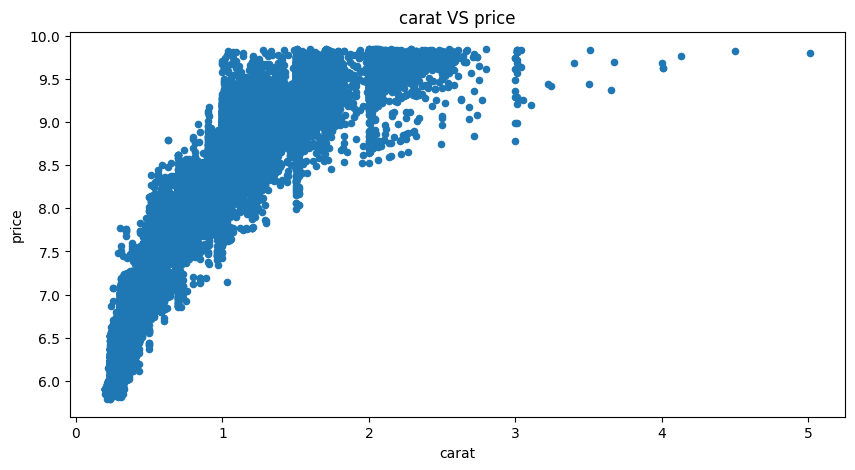

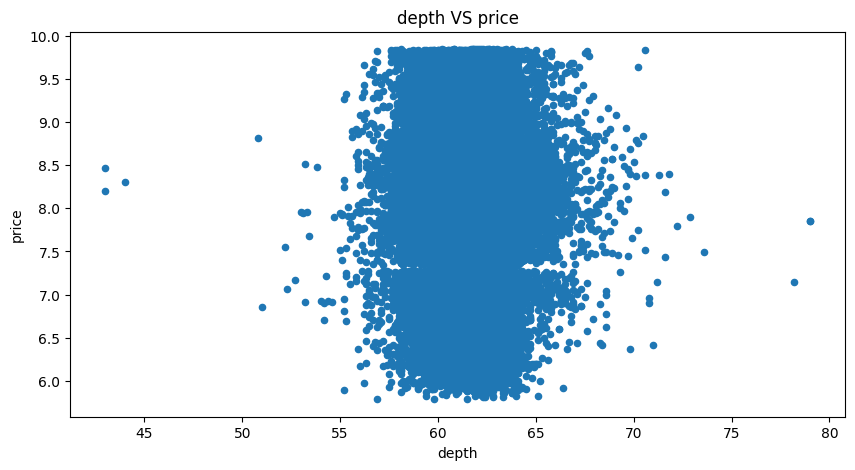

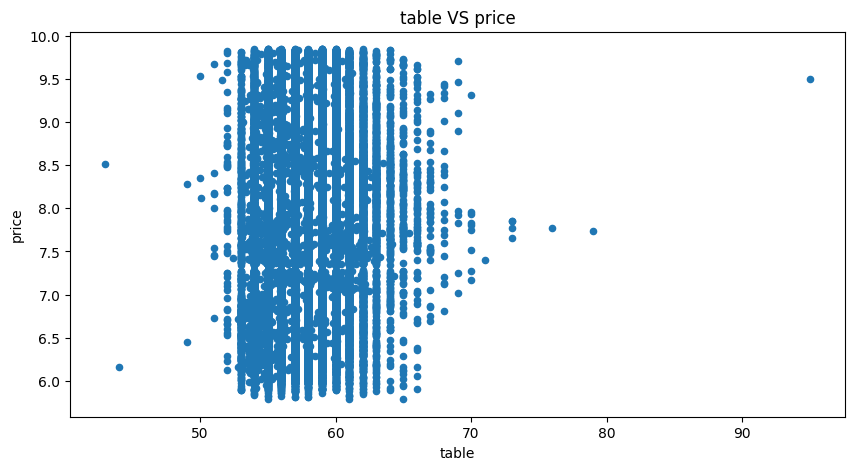

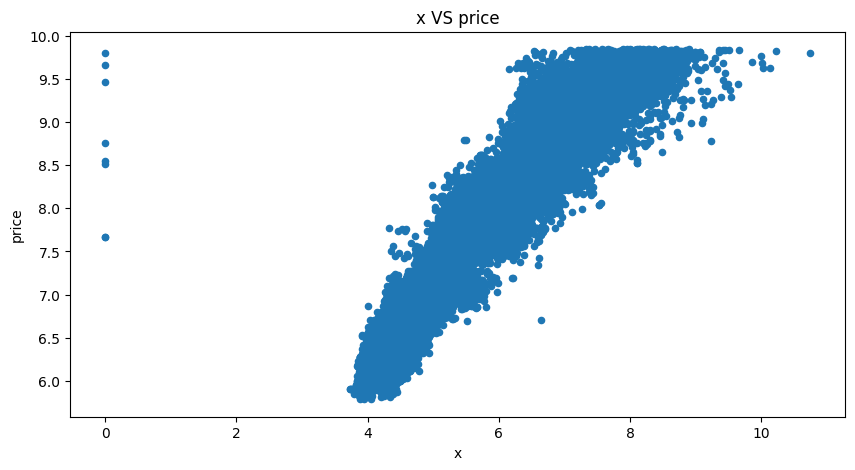

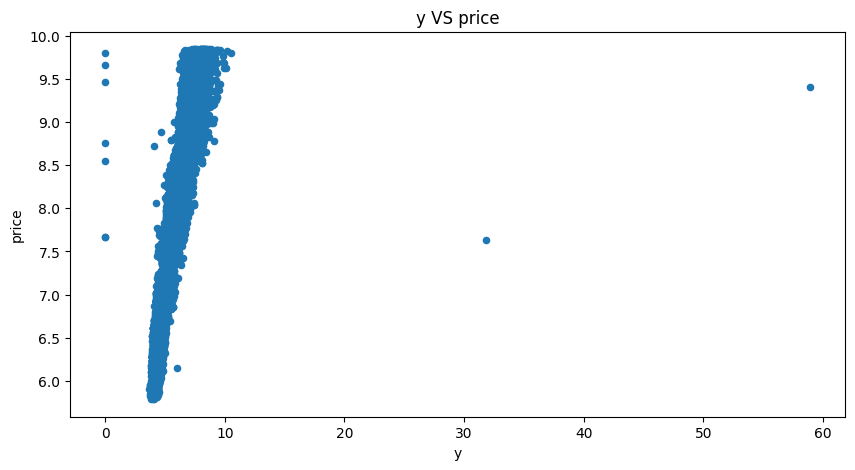

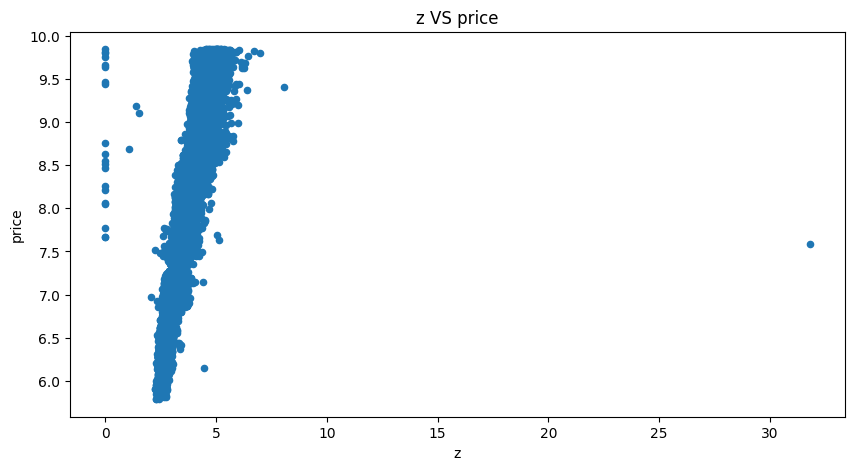

In [238]:
ContinousCols = ['carat', 'depth', 'table', 'x', 'y', 'z']

#Plotting Scatter Chart for each predictor vs the target variable
for predictor in ContinousCols:
    DiamondData.plot.scatter(x=predictor, y='price', figsize=(10, 5), title=predictor + ' VS price')


**Scatter Chart Inteperation**
* carat - This variable shows a increasing trend with respect to price.
* depth - This variable does not show any trend with respct to price, indicating a weak correlation.
* table - This variable does not show any trend with respect to price, indicating a weak correlation.
* x - This variable shows a clear increasing trend with respect to price.
* y - This variable shows a clear increasing trend with respect to price.
* z - This variable shows a clear increasing trend with respect to price.

**Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**


In [239]:
#Calculate Correlation Matrix
ContinousCols = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
CorrelationData = DiamondData[ContinousCols].corr()
CorrelationData


,price,carat,depth,table,x,y,z
price,1.000000,0.920207,0.000860,0.158208,0.958010,0.936173,0.935218
carat,0.920207,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,0.000860,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,0.158208,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,0.958010,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,0.936173,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,0.935218,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


In [240]:
ContinousCols = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']

#Calculating the correleation matrix
CorrelationData = DiamondData[ContinousCols].corr()
CorrelationData




,price,carat,depth,table,x,y,z
price,1.000000,0.920207,0.000860,0.158208,0.958010,0.936173,0.935218
carat,0.920207,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,0.000860,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,0.158208,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,0.958010,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,0.936173,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,0.935218,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


In [241]:
#Filtering those columns where absolute correlation > 0.5 with Target Variable ('price')
CorrelationData['price'][abs(CorrelationData['price']) > 0.5 ]


price    1.000000
carat    0.920207
x        0.958010
y        0.936173
z        0.935218
Name: price, dtype: float64

**Observations from Correlation Matrix Analysis:**
* carat, x, y ,z all have extremely high correlation values over 0.9 indicating a strong relationship
* depth and tablle both have extremely low correlation values indicating a weak relationship
* Selected Continous columns:
* **carat**, **x**, **y**, **z**


 **Relationship exploration: Categorical Vs Continuous - Box Plots**
 * We now explore the relationship betweeen the three categorical predicors
(cut, color, clarity) with the target variable price.

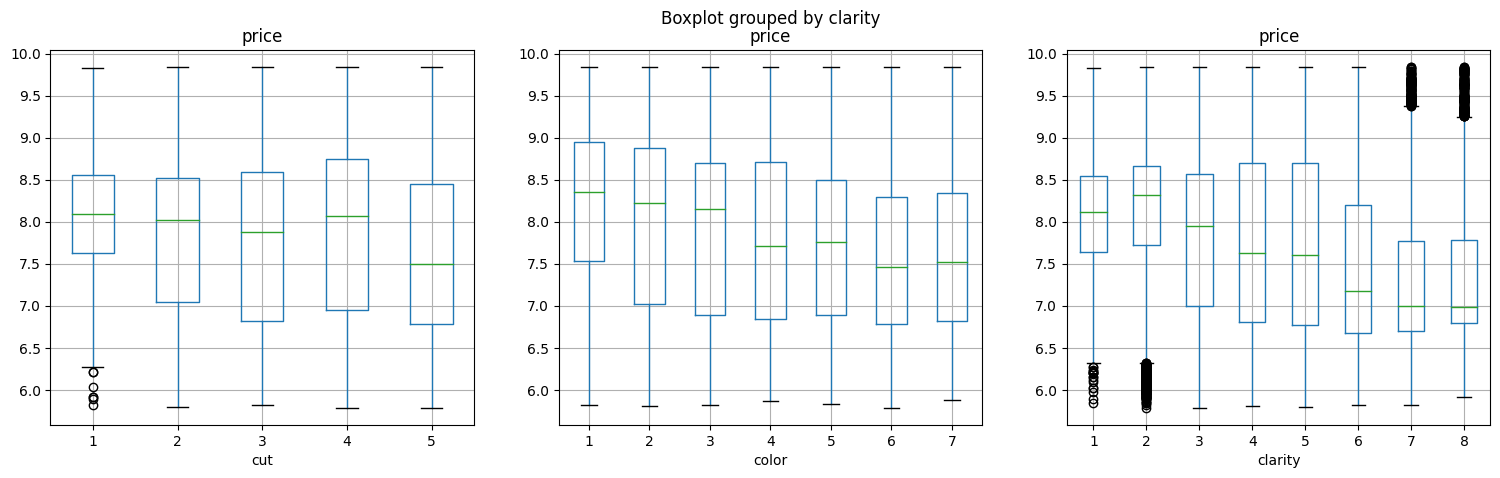

In [242]:
CategoricalColsList=['cut', 'color', 'clarity']
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
  DiamondData.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

**Box Plot Interpretation**
* The distribution is different for each category, indicating a correlation with the target variable 'price'


 **Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**


In [243]:
def FunctionAnova(inputData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    SelectedPredictors = []
    print('##### ANOVA Results ##### \n')

    for predictor in CategoricalPredictorList:
        CategoryGroupLists = inputData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return SelectedPredictors

CategoricalPredictorList = ['cut', 'color', 'clarity']
FunctionAnova(inputData=DiamondData, TargetVariable='price', CategoricalPredictorList=CategoricalPredictorList)


##### ANOVA Results ##### 

cut is correlated with price | P-Value: 2.0834787552261962e-212
color is correlated with price | P-Value: 3.767555050498703e-301
clarity is correlated with price | P-Value: 0.0


['cut', 'color', 'clarity']

**Observations from ANOVA test**
* The results of the ANOVA test support our visual analysis from the above box plots
* All categorical variables are correlated with the target variable and therefore will be included in the final dataset

**Observations from Step 10: Visual and Statistic Correlation analysis for selection of best features**
* Continous variables (carat, x, y,z) are selected as they have high correlations with the target variable price.
* Continous variables (depth and table) are not selected as they have low correlations with the target variable price.
Categorical Predictors
* All categorical predictors are selected as they all correlated with the target variable 'price'

**Removing Categorical Variables Depth and Table**

In [244]:
#Removing uncorrelated columns
DiamondData = DiamondData.drop('depth', axis=1)
DiamondData = DiamondData.drop('table', axis=1)

**Selecting final predictor for ML/AI Model**

In [245]:
SelectedColumns = ['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']
DataForML = DiamondData[SelectedColumns]
DataForML.head()

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,5,6,2
1,0.21,3.89,3.84,2.31,4,6,3
2,0.23,4.05,4.07,2.31,2,6,5
3,0.29,4.20,4.23,2.63,4,2,4
4,0.31,4.34,4.35,2.75,2,1,2


In [246]:
#Saving this final data subset for reference during demployment
DataForML.to_pickle('DataForML.pkl')

**Step 11: Data Conversion to numeric values for machine
learning/predictive analysis**


In [247]:
#Treating all the nominal variables at once using dummy variables
DataForML_Numeric = pd.get_dummies(DataForML)

DataForML_Numeric['price'] = DiamondData['price']

DataForML_Numeric.head()

,carat,x,y,z,cut,color,clarity,price
0,0.23,3.95,3.98,2.43,5,6,2,5.786897
1,0.21,3.89,3.84,2.31,4,6,3,5.786897
2,0.23,4.05,4.07,2.31,2,6,5,5.789960
3,0.29,4.20,4.23,2.63,4,2,4,5.811141
4,0.31,4.34,4.35,2.75,2,1,2,5.814131


**Machine Learning Model Development**

In [248]:
#Printing all the columns names for our reference
DataForML_Numeric.columns

Index(['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity', 'price'], dtype='object')

In [249]:
#seperate target variable and predictor variables
TargetVariable = 'price'
Predictors = ['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']

X = DataForML_Numeric[Predictors].values
Y = DataForML_Numeric[TargetVariable].values

#Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=428)

In [250]:
DataForML_Numeric.head()

,carat,x,y,z,cut,color,clarity,price
0,0.23,3.95,3.98,2.43,5,6,2,5.786897
1,0.21,3.89,3.84,2.31,4,6,3,5.786897
2,0.23,4.05,4.07,2.31,2,6,5,5.789960
3,0.29,4.20,4.23,2.63,4,2,4,5.811141
4,0.31,4.34,4.35,2.75,2,1,2,5.814131


**Standardization/Normalization of data**

In [251]:
#Standardization of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler = MinMaxScaler()
PredictorScalerFit = PredictorScaler.fit(X)
X = PredictorScalerFit.transform(X)

# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(37758, 7)
(37758,)
(16182, 7)
(16182,)


**Step 12:  Investigating Multiple Regression algorithms**

In [252]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

RegModel = LinearRegression()
print(RegModel)

# Train the model on Training Data
LREG = RegModel.fit(X_train, Y_train)
prediction = LREG.predict(X_test)

print('R2 Value:  ', metrics.r2_score(Y_train, LREG.predict(X_train)))

LinearRegression()
R2 Value:   0.9629924303954775


In [253]:
#Model Validation
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = Y_test
TestingDataResults['Predicted' + TargetVariable] = np.round(prediction)
print(TestingDataResults.head())
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults[TargetVariable] - TestingDataResults['Predicted' + TargetVariable])) / TestingDataResults[TargetVariable])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE

print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

      carat         x         y         z   cut     color   clarity     price  \
0  0.008316  0.369646  0.067912  0.077673  1.00  0.500000  0.857143  6.326149   
1  0.079002  0.506518  0.092020  0.102516  0.50  0.666667  0.714286  7.696667   
2  0.041580  0.443203  0.080475  0.092767  1.00  0.833333  0.714286  7.121252   
3  0.047817  0.458101  0.083022  0.093711  0.75  0.833333  0.714286  7.173192   
4  0.280665  0.692737  0.125127  0.144969  1.00  0.833333  0.142857  8.839422   

   Predictedprice  
0             6.0  
1             8.0  
2             7.0  
3             7.0  
4             9.0  
Mean Accuracy on test data: 96.11005561228124
Median Accuracy on test data: 96.39176813465934


In [254]:
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

Accuracy_Values = cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


Accuracy values for 10-fold Cross Validation:
 [98.40683495 98.32729028 98.29280987 98.07391783 98.08209744 98.13566165
 97.97573463 98.30284244 98.71777512 98.55959988]

Final Average Accuracy of the model: 98.29


**Decision Tree Regressor**

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value is: 0.9616893479774611


<Axes: >

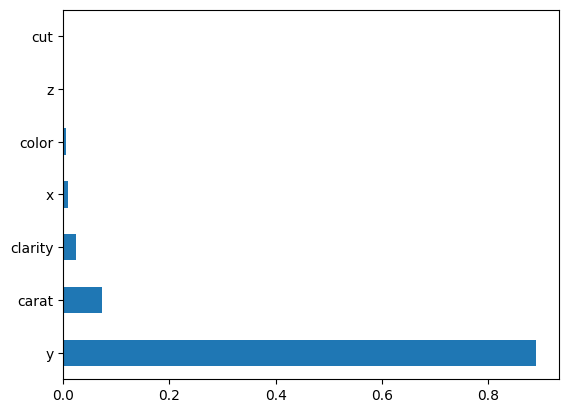

In [255]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
print(RegModel)

# Train the model on Training Data
DecisionTree = RegModel.fit(X_train, Y_train)
prediction = DecisionTree.predict(X_test)

from sklearn import metrics
print('R2 Value is:',metrics.r2_score(Y_train, DecisionTree.predict(X_train)))

%matplotlib inline
feature_importances = pd.Series(DecisionTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [256]:
#Model Validation
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = Y_test
TestingDataResults['Predicted' + TargetVariable] = np.round(prediction)

print(TestingDataResults.head())
TestingDataResults['PercentError']=100 * ((abs(
TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MeanPercentError=np.mean(TestingDataResults['PercentError'])
MedianPercentError=np.median(TestingDataResults['PercentError'])
Accuracy =100 - MeanPercentError
MedianAccuracy=100- MedianPercentError
print('The Mean Accuracy on test data is:', Accuracy)
print('The Median Accuracy on test data is:', MedianAccuracy)

      carat         x         y         z   cut     color   clarity     price  \
0  0.008316  0.369646  0.067912  0.077673  1.00  0.500000  0.857143  6.326149   
1  0.079002  0.506518  0.092020  0.102516  0.50  0.666667  0.714286  7.696667   
2  0.041580  0.443203  0.080475  0.092767  1.00  0.833333  0.714286  7.121252   
3  0.047817  0.458101  0.083022  0.093711  0.75  0.833333  0.714286  7.173192   
4  0.280665  0.692737  0.125127  0.144969  1.00  0.833333  0.142857  8.839422   

   Predictedprice  
0             6.0  
1             8.0  
2             7.0  
3             7.0  
4             9.0  
The Mean Accuracy on test data is: 95.7539408659313
The Median Accuracy on test data is: 96.24340514906147


In [257]:
# Defining a custom function to calculate accuracy
def calculate_Accuracy(originalData, predictedData):
  MeanPercentError = np.mean(100 * (np.abs(originalData-predictedData)/originalData))
  return (100-MeanPercentError)

# Custom Scoring Mean Percent Error calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(calculate_Accuracy, greater_is_better = True)

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [96.5438778  97.21554491 97.25433988 96.168505   96.94041613 97.26180712
 96.74191446 96.36614436 96.81629313 96.69782654]

Final Average Accuracy of the model: 96.8


Plotting The Decision Tree

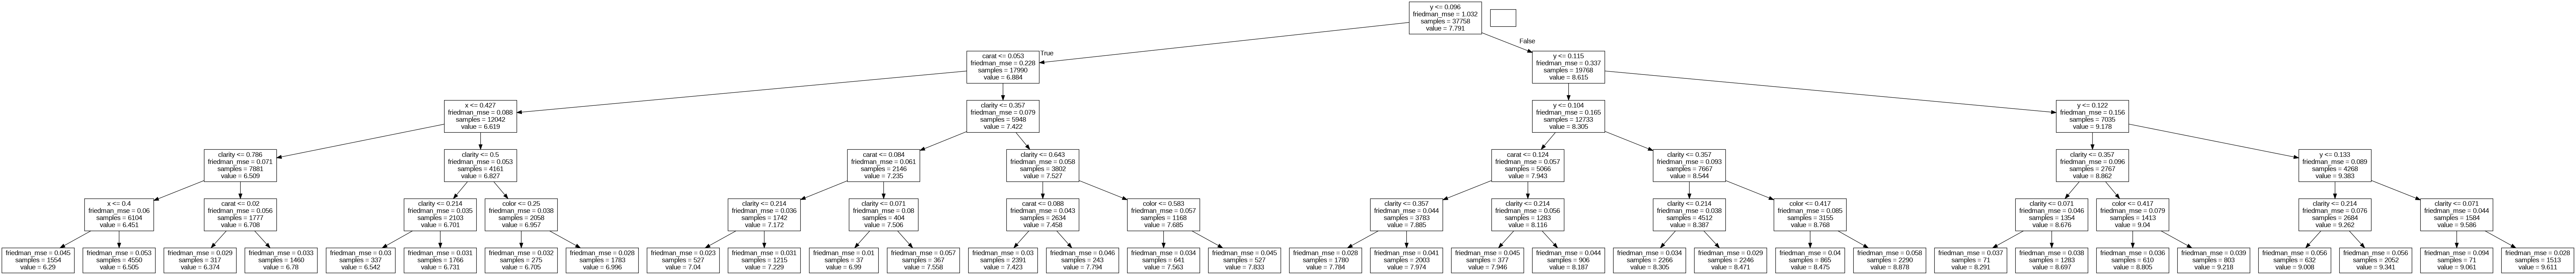

In [258]:
from IPython.display import Image
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=[str(TargetVariable)])

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png(), width=2000, height=2000)


**Random Forest Regressor**

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9540596280864253


<Axes: >

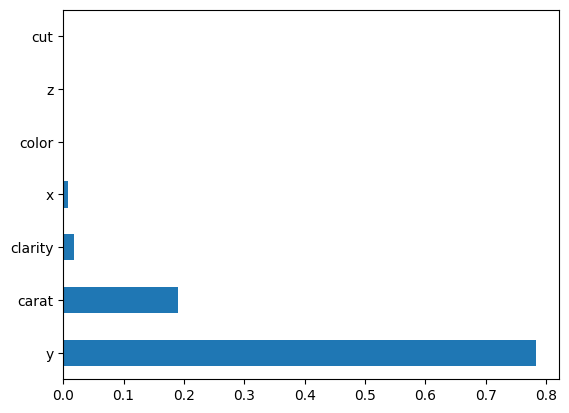

In [259]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
print(RegModel)

# Train the model on Training Data
RandomForest = RegModel.fit(X_train, Y_train)
Prediction = RandomForest.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
print('R2 Value:',metrics.r2_score(Y_train, RandomForest.predict(X_train)))


%matplotlib inline
feature_importances = pd.Series(RandomForest.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [260]:
#Model Validation
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = Y_test
TestingDataResults['Predicted' + TargetVariable] = np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['PercentError']=100 * ((abs(
TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MeanPercentError=np.mean(TestingDataResults['PercentError'])
MedianPercentError=np.median(TestingDataResults['PercentError'])
Accuracy =100 - MeanPercentError
MedianAccuracy=100- MedianPercentError
print('The Mean Accuracy on test data is:', Accuracy)
print('The Median Accuracy on test data is:', MedianAccuracy)

      carat         x         y         z   cut     color   clarity     price  \
0  0.008316  0.369646  0.067912  0.077673  1.00  0.500000  0.857143  6.326149   
1  0.079002  0.506518  0.092020  0.102516  0.50  0.666667  0.714286  7.696667   
2  0.041580  0.443203  0.080475  0.092767  1.00  0.833333  0.714286  7.121252   
3  0.047817  0.458101  0.083022  0.093711  0.75  0.833333  0.714286  7.173192   
4  0.280665  0.692737  0.125127  0.144969  1.00  0.833333  0.142857  8.839422   

   Predictedprice  
0             6.0  
1             8.0  
2             7.0  
3             7.0  
4             9.0  
The Mean Accuracy on test data is: 95.7539408659313
The Median Accuracy on test data is: 96.24340514906147


In [ ]:
# Defining a custom function to calculate accuracy
def calculate_Accuracy(originalData, predictedData):
  MeanPercentError = np.mean(100 * (np.abs(originalData-predictedData)/originalData))
  return (100-MeanPercentError)

# Custom Scoring Mean Percent Error calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(calculate_Accuracy, greater_is_better = True)

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Visualising Random Forest Regressor

In [ ]:
#Loading Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
Graph = pydotplus.graph_from_dot_data(dot_data)

# Displaying Graph
Image(Graph.create_png(), width=2000,height=2000)


**Adaboost Algorithm**

In [ ]:
#Adaboost Algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

print(RegModel)

AB=RegModel.fit(X_train,Y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(Y_train, AB.predict(X_train)))

%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


In [ ]:
#Model Validation
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = Y_test
TestingDataResults['Predicted' + TargetVariable] = np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['PercentError']=100 * ((abs(
TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MeanPercentError=np.mean(TestingDataResults['PercentError'])
MedianPercentError=np.median(TestingDataResults['PercentError'])
Accuracy =100 - MeanPercentError
MedianAccuracy=100- MedianPercentError
print('The Mean Accuracy on test data is:', Accuracy)
print('The Median Accuracy on test data is:', MedianAccuracy)

In [ ]:
# Defining a custom function to calculate accuracy
def calculate_Accuracy(originalData, predictedData):
  MeanPercentError = np.mean(100 * (np.abs(originalData-predictedData)/originalData))
  return (100-MeanPercentError)

# Custom Scoring Mean Percent Error calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(calculate_Accuracy, greater_is_better = True)

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**XGBoost Regressor**

In [ ]:
#XGBoost Model
from xgboost import XGBRegressor
import pandas as pd
import pickle
from sklearn.metrics import r2_score

# Train the model on Training Data
RegModel = XGBRegressor(
    max_depth=2,
    learning_rate=0.1,
    n_estimators=1000,
    objective='reg:linear',
    booster='gbtree'
)
print(RegModel)

XGB = RegModel.fit(X_train, Y_train)
prediction=XGB.predict(X_test)

# Evaluate R2 value
train_r2 = r2_score(Y_train, XGB.predict(X_train))
print('R2 Value:', train_r2)

# Plot feature importances
import matplotlib.pyplot as plt
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
#Model Validation
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = Y_test
TestingDataResults['Predicted' + TargetVariable] = np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['PercentError']=100 * ((abs(
TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MeanPercentError=np.mean(TestingDataResults['PercentError'])
MedianPercentError=np.median(TestingDataResults['PercentError'])
Accuracy =100 - MeanPercentError
MedianAccuracy=100- MedianPercentError
print('The Mean Accuracy on test data is:', Accuracy)
print('The Median Accuracy on test data is:', MedianAccuracy)

In [ ]:
# Defining a custom function to calculate accuracy
def calculate_Accuracy(originalData, predictedData):
  MeanPercentError = np.mean(100 * (np.abs(originalData-predictedData)/originalData))
  return (100-MeanPercentError)

# Custom Scoring Mean Percent Error calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(calculate_Accuracy, greater_is_better = True)

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

**K-Nearest Neighbor(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

RegModel = KNeighborsRegressor(n_neighbors=3)
print(RegModel)

# Train the model on Training Data
KNN=RegModel.fit(X_train,Y_train)
prediction=KNN.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
print('R2 Value:',metrics.r2_score(Y_train, KNN.predict(X_train)))

In [ ]:
#Model Validation
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = Y_test
TestingDataResults['Predicted' + TargetVariable] = np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['PercentError']=100 * ((abs(
TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MeanPercentError=np.mean(TestingDataResults['PercentError'])
MedianPercentError=np.median(TestingDataResults['PercentError'])
Accuracy =100 - MeanPercentError
MedianAccuracy=100- MedianPercentError
print('The Mean Accuracy on test data is:', Accuracy)
print('The Median Accuracy on test data is:', MedianAccuracy)

In [ ]:
# Defining a custom function to calculate accuracy
def calculate_Accuracy(originalData, predictedData):
  MeanPercentError = np.mean(100 * (np.abs(originalData-predictedData)/originalData))
  return (100-MeanPercentError)

# Custom Scoring Mean Percent Error calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(calculate_Accuracy, greater_is_better = True)

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Support Vector Machine (SVM) Regressor**

In [ ]:
#SVM
from sklearn import svm

RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)
print(RegModel)

# Train the model on Training Data
SVM=RegModel.fit(X_train,Y_train)
prediction=SVM.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
print('R2 Value:',metrics.r2_score(Y_train, KNN.predict(X_train)))

In [ ]:
#Model Validation
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = Y_test
TestingDataResults['Predicted' + TargetVariable] = np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['PercentError']=100 * ((abs(
TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MeanPercentError=np.mean(TestingDataResults['PercentError'])
MedianPercentError=np.median(TestingDataResults['PercentError'])
Accuracy =100 - MeanPercentError
MedianAccuracy=100- MedianPercentError
print('The Mean Accuracy on test data is:', Accuracy)
print('The Median Accuracy on test data is:', MedianAccuracy)

In [ ]:
# Defining a custom function to calculate accuracy
def calculate_Accuracy(originalData, predictedData):
  MeanPercentError = np.mean(100 * (np.abs(originalData-predictedData)/originalData))
  return (100-MeanPercentError)

# Custom Scoring Mean Percent Error calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(calculate_Accuracy, greater_is_better = True)

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Step 21: Model Deployment**
* I am choosing *XGBoost Regressor** as the final model it has the highest accuracy



In [ ]:
#This is the most current version of scikit-learn, this allows it to be compatible with most current versions of any IDE
!pip install scikit-learn==1.4.2

In [ ]:
from xgboost import XGBRegressor
import pickle

X = DataForML_Numeric[Predictors].values
Y = DataForML_Numeric[TargetVariable].values

# Train XGBoost model
RegModel = XGBRegressor(
    max_depth=2,
    learning_rate=0.1,
    n_estimators=1000,
    objective='reg:linear',
    booster='gb[]

XGB_Model = RegModel.fit(X, Y)
# Save the trained model
with open('XGB_Model.pkl', 'wb') as file:
    pickle.dump(XGB_Model, file)

In [ ]:
from google.colab import files
files.download('XGB_Model.pkl')